In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent))
from scripts.save_figure import save_fig

 Python doesn't automatically recognize your scripts/ folder as a module when running from a Jupyter notebook or script unless the path is explicitly added.

In [5]:
transaction_df = pd.read_csv("/home/bishnu/project/EDA_transaction_data/data/processed/transactions_cleaned.csv")

## accountNumber and customerID

In [6]:
transaction_df[["accountNumber","customerId"]].nunique()

accountNumber    5000
customerId       5000
dtype: int64

In [7]:
transaction_df[transaction_df["accountNumber"] == transaction_df["customerId"]]

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,cross_border_count,txn_hour,txn_month,txn_day
0,733493772,733493772,5000,5000.00,2016-01-08 19:04:50,111.33,Lyft,US,US,5.0,...,9184,PURCHASE,True,0.00,False,False,0,19,1,8
1,733493772,733493772,5000,4888.67,2016-01-09 22:32:39,24.75,Uber,US,US,9.0,...,9184,PURCHASE,False,111.33,False,False,0,22,1,9
2,733493772,733493772,5000,4863.92,2016-01-11 13:36:55,187.40,Lyft,US,US,5.0,...,9184,PURCHASE,False,136.08,False,False,0,13,1,11
3,733493772,733493772,5000,4676.52,2016-01-11 22:47:46,227.34,Lyft,US,US,2.0,...,9184,PURCHASE,True,323.48,False,False,0,22,1,11
4,733493772,733493772,5000,4449.18,2016-01-16 01:41:11,0.00,Lyft,US,US,2.0,...,9184,ADDRESS_VERIFICATION,False,550.82,False,False,0,1,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637661,186770399,186770399,7500,2574.02,2016-12-04 12:29:21,5.37,Apple iTunes,US,US,5.0,...,5432,PURCHASE,False,4925.98,False,False,0,12,12,4
637662,186770399,186770399,7500,2568.65,2016-12-09 04:20:35,223.70,Blue Mountain eCards,US,US,9.0,...,5432,PURCHASE,False,4931.35,False,False,0,4,12,9
637663,186770399,186770399,7500,2344.95,2016-12-16 07:58:23,138.42,Fresh Flowers,US,US,2.0,...,5432,PURCHASE,False,5155.05,False,False,0,7,12,16
637664,186770399,186770399,7500,2206.53,2016-12-19 02:30:35,16.31,abc.com,US,US,9.0,...,5432,PURCHASE,False,5293.47,False,False,0,2,12,19


In [8]:
accountNumber_plot = transaction_df["accountNumber"].value_counts().head(10).sort_values(ascending=False,).reset_index()

In [9]:
transaction_df["accountNumber"] = transaction_df["accountNumber"].astype("object")
transaction_df["customerId"] = transaction_df["customerId"].astype("object")

/home/bishnu/project/EDA_transaction_data/visuals/plots/Top_10_accountNumber.png
Figure saved to: /home/bishnu/project/EDA_transaction_data/visuals/plots/Top_10_accountNumber.png


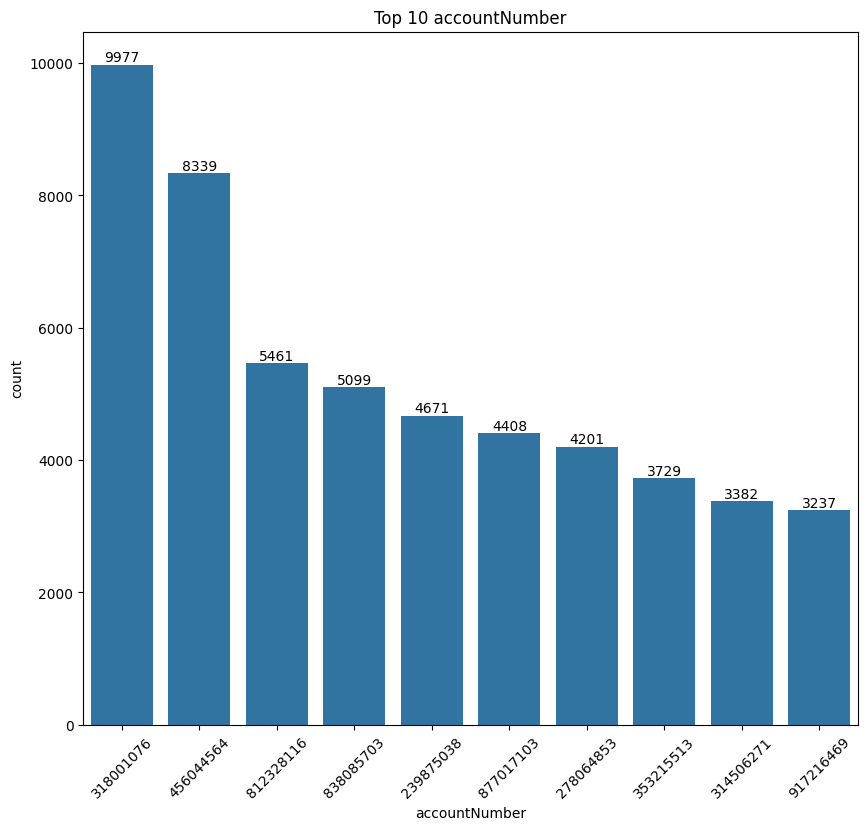

In [22]:
plt.figure(figsize=(10,9))
ax = sns.barplot(data=accountNumber_plot,x="accountNumber",y="count",order=accountNumber_plot["accountNumber"])
for i in ax.containers:
    ax.bar_label(i,)
plt.ylabel("count")
plt.xlabel("accountNumber")
plt.xticks(rotation=45)
plt.title("Top 10 accountNumber")
save_fig("Top_10_accountNumber")
plt.show()

In [27]:
customerId_plot = transaction_df["customerId"].value_counts().head(10).sort_values(ascending=False,).reset_index()

/home/bishnu/project/EDA_transaction_data/visuals/plots/Top_10_CustomerId.png
Figure saved to: /home/bishnu/project/EDA_transaction_data/visuals/plots/Top_10_CustomerId.png


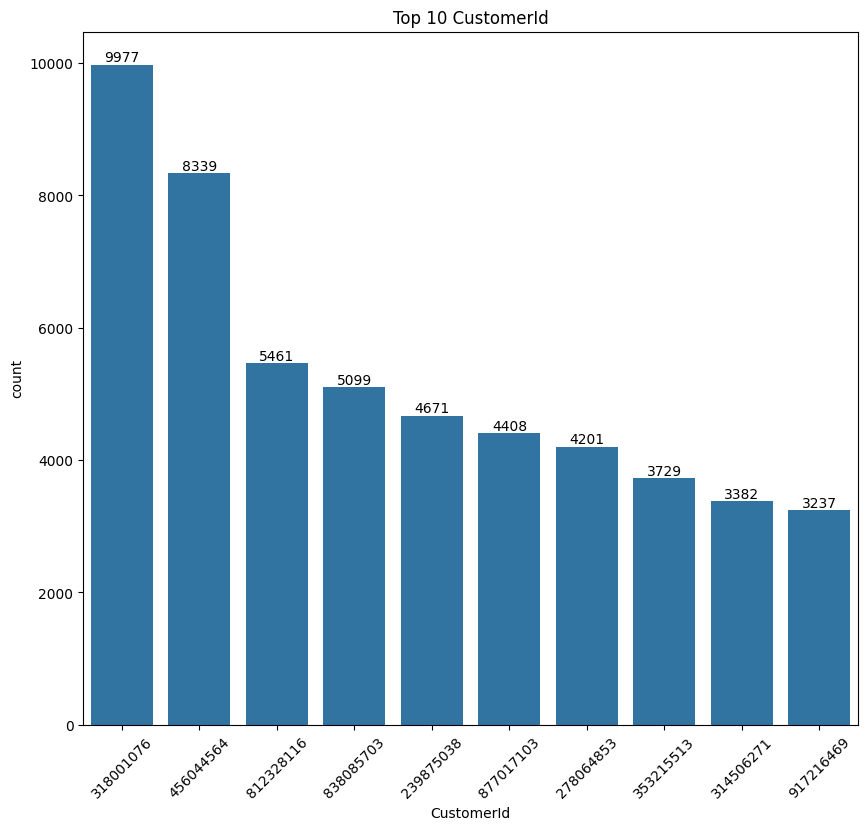

In [28]:
plt.figure(figsize=(10,9))
ax = sns.barplot(data=customerId_plot,x="customerId",y="count",order=customerId_plot["customerId"])
for i in ax.containers:
    ax.bar_label(i,)
plt.ylabel("count")
plt.xlabel("CustomerId")
plt.xticks(rotation=45)
plt.title("Top 10 CustomerId")
save_fig("Top_10_CustomerId")
plt.show()

* accountNumber and customerID are same for each row.
* Number of unique accountNumber or customerId is 5000.
* Most common account Numbers are 318001076 (9977 transactions), 456044564 (8339 transactions) and 812328116 (5461 transactions) among 5000 customers.

## Available Money